# Proyek Analisis Data: Bike Sharing Dataset


- Nama: Fajar Kurnia
- Email: fajarkurnia0919@gmail.com
- IdDicoding: fajar_kurnia19

## Menentukan Pertanyaan Bisnis

- Bagaimana tren pengguna sepeda tiap tahun?
- Bagaimana tren rata-rata pengguna sepeda tiap bulannya?
- Adakah perbedaan jumlah pengguna sepeda pada workingday, holiday dan weekday?
- Apakah musim mempengaruhi pengguna sepeda?

## Menyiapkan semua library yang dibutuhkan

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Tahap ini kita akan load dataset yang telah dikumpulkan dengan bantuan library pandas

### Load tabel day.csv

In [31]:
# Memuat tabel day
# Menampilkan 5 data teratas
day_df = pd.read_csv("D:\FAJAR\FAJAR\Bootcamp & Course\Dicoding\Dataset\Bike Sharing\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Load tabel hour.csv

In [32]:
# Memuat tabel hour
# Menampilkan 5 data teratas
hour_df = pd.read_csv("D:\FAJAR\FAJAR\Bootcamp & Course\Dicoding\Dataset\Bike Sharing\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kita tidak menggunakan tabel hour_df karna isi tabel sama dengan tabel day_df

### Assessing Data

### Menilai data day_df

In [33]:
# Melihat informasi pada data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


dteday seharusnya bertipe data datetime bukan object

In [34]:
# Melihat missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

In [35]:
# Melihat duplikat data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data duplikat

In [36]:
# Memeriksa parameter numerik tiap kolom
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan pada parameter statistiknya

### Menilai data hour

In [37]:
# Melihat informasi tabel hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


kolom dteday seharusnya bertipe data datetime bukan object

In [38]:
# Melihat missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

In [39]:
# Melihat apakah ada data duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [40]:
# Melihat parameter numerik tiap kolom
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan pada parameter statistiknya

### Cleaning Data

- Menghapus kolom yang tidak digunakan<br>
      Beberapa kolom yang akan dihapus karena tidak berhubungan dengan pertanyaan bisnis
     - instant   : catatan index
     - temp      : temperatur dalam celcius
     - atemp     : temperatur yang dirasakan
     - hum       : tingkat kelembapan
     - windspeed : kecepatan angin

In [41]:
drop_col = ["instant", "temp", "atemp", "hum", "windspeed"]

for column in day_df.columns:
    if column in drop_col:
        day_df.drop(labels=column, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


- Mengubah beberapa detil pada kolom <br>
Nama kolom masih sulit dibaca dan isi kolom masih berbentuk numerik di sini kita akan coba untuk merubah isi menjadi kategorikal agar lebih mudah dipahami.

In [42]:
# Mengubah nama kolom
day_df.rename(columns={
    'dteday': 'date(day)',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,date(day),season,year,month,holiday,weekday,workingday,weather_condition,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


In [43]:
# Mengubah isi kolom yang berupa numerik menjadi lebih mudah dibaca
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['year'] = day_df['year'].map({
    0: '2011', 1: '2012'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_condition'] = day_df['weather_condition'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Mist'
})
day_df['workingday'] = day_df['workingday'].map({
    0: 'Weekend/Holiday',
    1: 'Weekday',
})

In [44]:
# Mengubah tipe data kolom datedat ke datetime
day_df['date(day)'] = pd.to_datetime(day_df['date(day)'])

# Mengubah tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_condition'] = day_df.weather_condition.astype('category')


In [45]:
day_df.head()

,date(day),season,year,month,holiday,weekday,workingday,weather_condition,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Sat,Weekend/Holiday,Misty/Cloudy,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sun,Weekend/Holiday,Misty/Cloudy,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Mon,Weekday,Clear/Partly Cloudy,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tue,Weekday,Clear/Partly Cloudy,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wed,Weekday,Clear/Partly Cloudy,82,1518,1600


In [46]:
# Mengecek apakah ada tipe data yang belum sesaui
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date(day)          731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_condition  731 non-null    category      
 8   casual             731 non-null    int64         
 9   registered         731 non-null    int64         
 10  count              731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(3)
memory usage: 29.4 KB


Tahap Data Wrangling telah selesai

## Exploratory Data Analysis (EDA)

### Ekspolarasi data day_df

1. Melihat semua parameter statistik di day_df

In [47]:
day_df.describe(include='all')

,date(day),season,year,month,holiday,weekday,workingday,weather_condition,casual,registered,count
count,731,731,731,731,731.0,731,731,731,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,2,3,NaN,NaN,NaN
top,NaN,Fall,2012,Aug,0.0,Mon,Weekday,Clear/Partly Cloudy,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,500,463,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3410.000000,6946.000000,8714.000000


Dari hasil di atas terlihat bahwa jumlah pengguna terkecil perhari adalah 2 untuk pengguna casual dan 20 untuk pengguna registered dalam 1 hari, sedangkan untuk jumlah pengguna tertinggi ada pada angka 3410 untuk casual dan 6946 untuk registered.

2. Mengelompokkan jumlah pengguna berdasarkan tahun untuk masing-masing tipe pengguna

In [48]:
day_df.groupby(by='year', observed=True).agg({
    'casual': ['mean', 'max', 'min', 'sum'],
    'registered': ['mean', 'max', 'min', 'sum'],
    'count': ['mean', 'max', 'min', 'sum']
})

casual                     registered                      \
             mean   max min     sum         mean   max  min      sum   
year                                                                   
2011   677.402740  3065   9  247252  2728.358904  4614  416   995851   
2012  1018.483607  3410   2  372765  4581.450820  6946   20  1676811   

            count                      
             mean   max  min      sum  
year                                   
2011  3405.761644  6043  431  1243103  
2012  5599.934426  8714   22  2049576

Data di atas menunjukkan bahwa jumlah pengguna sepeda terbanyak ada di tahun 2012 dengan rata-rata 5600 pengguna di tahun yang sama. <br>
Pengguna registered lebih banyak dari pada pengguna casual tiap tahunnya.

3. Rata-rata pengguna sepeda berdasarkan bulan

In [49]:
day_df.groupby(by='month', observed=True).agg({
    'count': ['mean', 'max', 'min', 'sum']
})

count                    
              mean   max   min     sum
month                                 
Apr    4484.900000  7460   795  269094
Aug    5664.419355  7865  1115  351194
Dec    3403.806452  6606   441  211036
Feb    2655.298246  5062  1005  151352
Jan    2176.338710  4521   431  134933
Jul    5563.677419  8173  3285  344948
Jun    5772.366667  8120  3767  346342
Mar    3692.258065  8362   605  228920
May    5349.774194  8294  2633  331686
Nov    4247.183333  6852  1495  254831
Oct    5199.225806  8156    22  322352
Sep    5766.516667  8714  1842  345991

Pada hasil di atas terlihat jika rata-rata pengguna terbesar ada pada bulan Juni. <br> Sedangkan rata-rata terkecil ada di bulan Januari.

4. Melihat distribusi pengguna berdasarkan workingday

In [50]:
day_df.groupby(by='workingday', observed=True).agg({
    'count': ['mean', 'max', 'min', 'sum']
})

count                    
                        mean   max  min      sum
workingday                                      
Weekday          4584.820000  8362   22  2292410
Weekend/Holiday  4330.168831  8714  605  1000269

Berdasarkan hasil di atas ternyata lebih banyak penyewa sepeda pada hari kerja dibandingkan pada hari libur.

5. Melihat jumlah pengguna berdasarkan cuaca

In [51]:
day_df.groupby(by='weather_condition', observed=True).agg({
    'count': ['mean', 'max', 'min', 'sum']
})

count                    
                            mean   max  min      sum
weather_condition                                   
Clear/Partly Cloudy  4876.786177  8714  431  2257952
Light Snow/Rain      1803.285714  4639   22    37869
Misty/Cloudy         4035.862348  8362  605   996858

Hasil tersebut menunjukkan bahwa pengguna banyak yang menggunakan sepeda disaat hari cerah atau mendung dan sangat sedikit yang menggunakan sepeda saat salju turun atau hujan. Saat hujan lebat tidak ada yang menggunakan sepeda.

6. Melihat jumlah pengguna berdasarkan hari (weekday)

In [52]:
day_df.groupby(by='weekday', observed=True).agg({
    'count': ['mean', 'sum']
})

count        
                mean     sum
weekday                     
Fri      4690.288462  487790
Mon      4338.123810  455503
Sat      4550.542857  477807
Sun      4228.828571  444027
Thu      4667.259615  485395
Tue      4510.663462  469109
Wed      4548.538462  473048

Jumlah pengguna berdasarkan hari dari yang terbesar ke terkecil adalah Jumat(Fri), Kamis(Thu), Sabtu(Sat), Rabu(Wed), Selasa(Tue), Senin(Mon),dan Minggu(Sunday)

7. Melihat pengguna berdasarkan musim(season)

In [53]:
day_df.groupby(by='season', observed=True).agg({
    'count': ['mean', 'max', 'min', 'sum']
})

count                     
               mean   max   min      sum
season                                  
Fall    5644.303191  8714  1115  1061129
Spring  2604.132597  7836   431   471348
Summer  4992.331522  8362   795   918589
Winter  4728.162921  8555    22   841613

Para pengguna jauh lebih banyak saat musim gugur (Fall) setelahnya pada musim panas (Summer) dilanjut musim dingin (Winter) dan jumlah yang paling sedikit adalah musim semi (Spring) 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren pengguna sepeda tiap tahun?

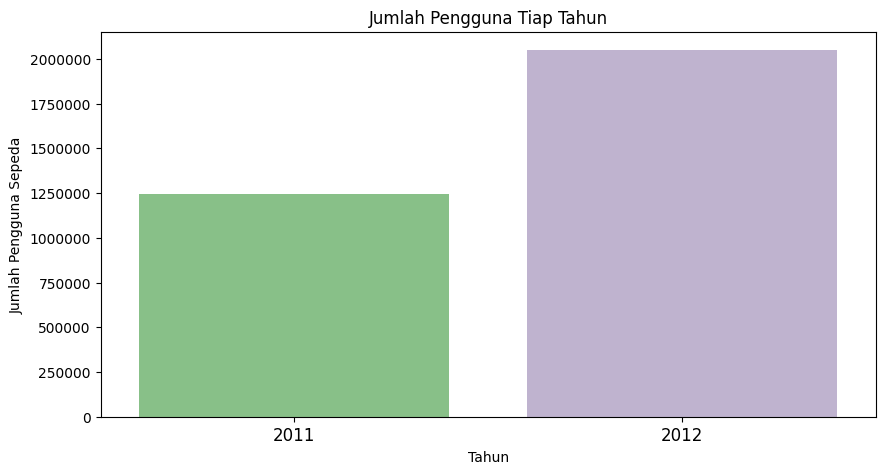

In [54]:
year_sum_df = day_df.groupby(by='year', observed=True).agg({
    'count': 'sum'
})

plt.figure(figsize=(10,5))
sns.barplot(
    x='year',
    y='count',
    data=year_sum_df,
    hue='year',
    palette='Accent',
    legend=False)

plt.title('Jumlah Pengguna Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.tick_params(axis='x', labelsize=12)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

Pada visualisasi yang dibuat terlihat bahwa terjadi peningkatan jumlah pengguna di tahun 2012 dibandingkan dengan tahun sebelumnya. Ini adalah sinyal positif jika penyewaan sepeda tumbuh tiap tahunnya.

### Pertanyaan 2: Tren rata-rata pengguna sepeda tiap bulannya?

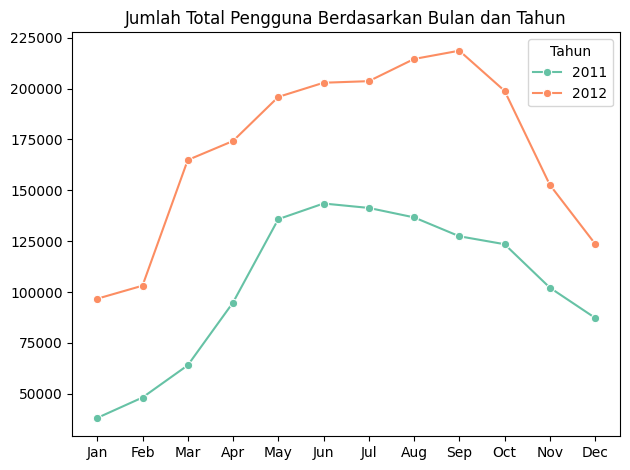

In [55]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"], observed=True).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="Set2",
    marker="o")

plt.title("Jumlah Total Pengguna Berdasarkan Bulan dan Tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Pada visualisasi kita bisa simpulkan penyewa pada bulan Juni adalah bulan dengan penyewa terbanyak tahun 2011 sedangkan bulan dengan penyewa terbanyak di tahun 2012 adalah bulan September.

### Pertanyaan 3: Adakah perbedaan jumlah pengguna sepeda pada workingday, holiday dan weekday?

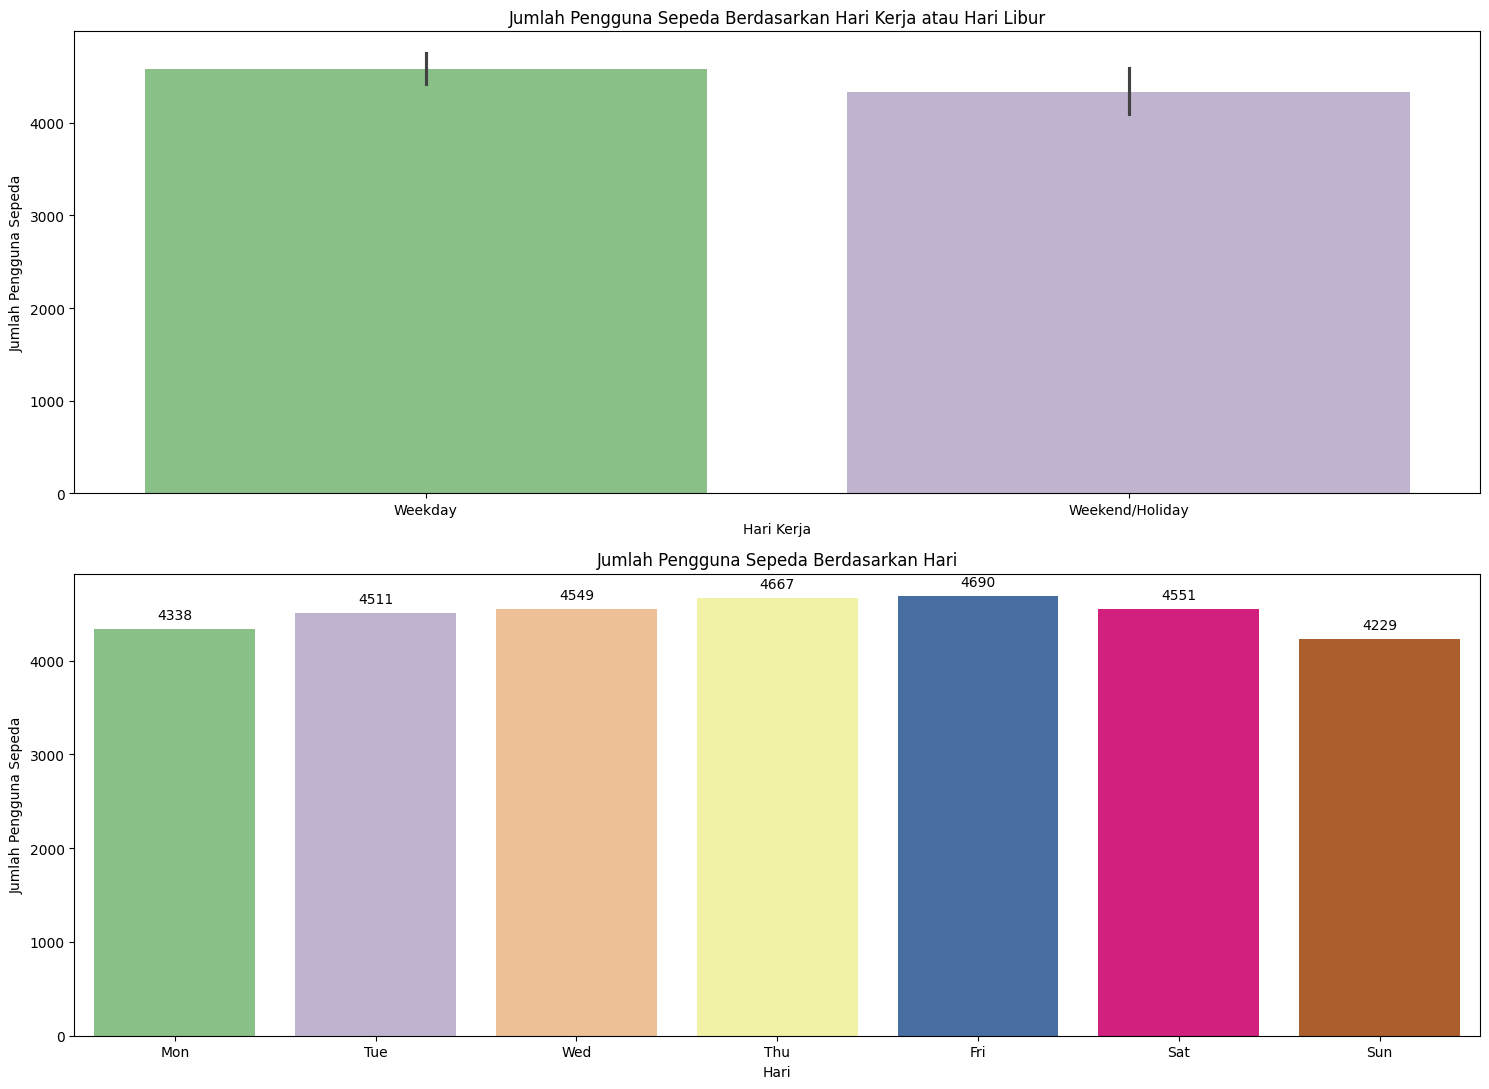

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,11))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0],
    hue='workingday',
    palette='Accent',
    legend=False)
axes[0].set_title('Jumlah Pengguna Sepeda Berdasarkan Hari Kerja atau Hari Libur')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

day_df['weekday'] = pd.Categorical(day_df['weekday'], categories=
    ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    ordered=True)

daily_count = day_df.groupby(by='weekday', observed=True).agg({
    'count': 'mean'
})

# Berdasarkan weekday
sns.barplot(
    x='weekday',
    y='count',
    data=daily_count,
    ax=axes[1],
    hue='weekday',
    palette='Accent',
    legend=False)

axes[1].set_title('Jumlah Pengguna Sepeda Berdasarkan Hari')
axes[1].set_xlabel('Hari')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Menambahkan label
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data yang telah dibuat dengan barplot, didapatkan hasil sebagai berikut:
   - Para penyewa sepeda lebih banyak di hari kerja dibandingkan di hari libur atau akhir pekan.
   - Jumlah penyewa sepeda terbanyak di hari Jumat(Fri) dan hari Kamis(Thu) sedangkan jumlah penyewa terendah ada di hari Senin(Mon) dan Minggu(Sun).

### Pertanyaan 4: Apakah cuaca mempengaruhi pengguna sepeda?

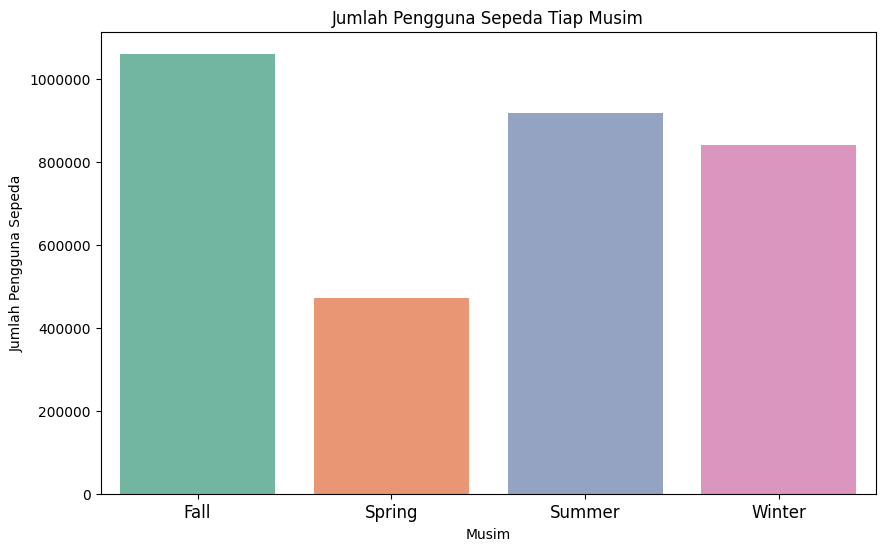

In [57]:
season_sum = day_df.groupby(by='season', observed=True).agg({
    'count': 'sum'
}).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='season',
    y='count',
    data=season_sum,
    hue='season',
    palette='Set2',
    legend=False)

plt.title('Jumlah Pengguna Sepeda Tiap Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Visualisasi tersebut menampakkan bahwa pengguna lebih menyukai bersepeda saat musim gugur (Fall) dan kurang berminat bersepada saat musim semi (Spring)

## Conclusion

- Conclusion pertanyaan 1:<br> 
    Sangat jelas dari visualisasi yang tersaji jika pada tahun 2011 penyewa berada di angka 6043 dan tahun 2012 berada di angka 8714 yang membuktikan terjadi kenaikan penyewa dari tahun 2011 ke tahun 2012. Ini juga membutikan jika banyak orang mulai melirik untuk menggunakan sepeda untuk menjalani keseharian mereka
- Conclusion pertanyaan 2:<br>
  Pada visualisasi kita bisa simpulkan jika penyewaan sepeda sangat positif pada Q1 sampai akhir Q2 yang puncaknya adalah bulan Juni namun berangsur turun di awal Q3 sampai akhir tahun di tahun 2011 dan begitu juga pada tahun 2012 yang mengalami peningkatan dari Q1 sampai awal Q3 yang di mana puncaknya ada di bulan September namun turun di awal Q4 sampai penutupan Q4. Namun bisa dipastikan jika dibanding tahun 2011 tahun 2012 memiliki jumlah penyewa tiap bulan lebih tinggi.
- Conclusion pertanyaan 3:<br> 
    Pada visualisasi "Jumlah Pengguna Sepeda Berdasarkan Hari Kerja atau Hari Libur" terlihat jika pengguna pada hari kerja lebih banyak dibanding pada hari libur seperti Weekend/Tanggal Merah. Hal ini bisa terjadi karena pengguna lebih senang menggunakan sepeda saat hari kerja walaupun berdasarkan data tidak terlalu besar perbedaan antara pengguna di hari kerja dan hari libur. Beralih ke visualisasi "Jumlah Pengguna Sepeda Berdasarkan Hari" terlihat jika hari Jumat(Fri) adalah hari dengan pengguna terbanyak dengan 4690 berbeda sedikit dengan hari Kamis(Thu) dengan 4667 yang ada di bawahnya dan hari minggu menjadi hari yang paling sedikit pengguna sepeda dengan 4229.
- Conclusion pertanyaan 4:<br> 
    Visualisasi "Jumlah Pengguna Sepeda Tiap Musim" menggambarkan bahwa musim Gugur (Fall) adalah musim favorit untuk menggunakan sepeda sedangkan musim semi (Spring) adalah musim dengan pengguna sepeda paling sedikit dibandingkan musim lain. Fakta ini bisa jadi karena faktor cuaca, suasana dll.

In [58]:
day_df.to_csv("day_df.csv", index=False)